In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

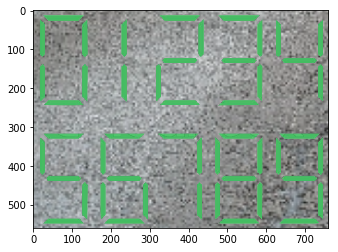

In [37]:
im=cv2.imread('imgs/original.png')
plt.imshow(im)

In [38]:
im = np.logical_and(im[:,:,1]>170, im[:,:,0]<100)
im = im.astype(np.int)*255

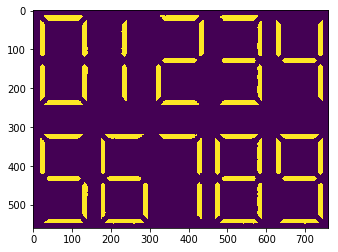

In [39]:
plt.imshow(im)

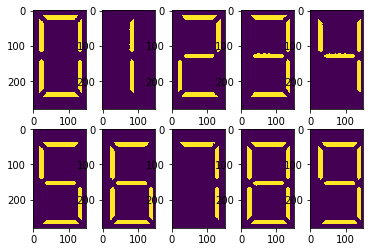

In [41]:
row = size[0]/2
col = size[0]/4+10
count = 1
plt.figure
im_train = []
for j in range(1,3):
    for i in range(1,6):
        im_clp = im[row*(j-1):row*j, col*(i-1):col*i]
        cv2.imwrite('imgs/'+str(count)+'.png', im_clp)
        plt.subplot(2,5,count)
        plt.imshow(im_clp)
        count += 1
        im_train.append(im_clp)

(280, 150)

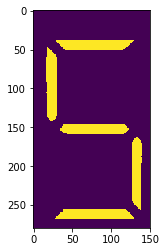

In [179]:
plt.imshow(im_train[5])
size = im_train[5].shape
size

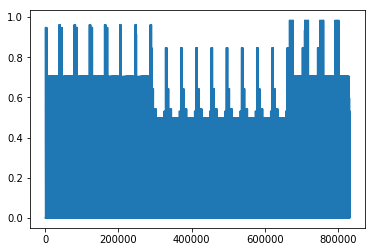

In [180]:
hog_extractor = cv2.HOGDescriptor()
hog = hog_extractor.compute(im_train[5].astype(np.uint8))
plt.plot(hog)

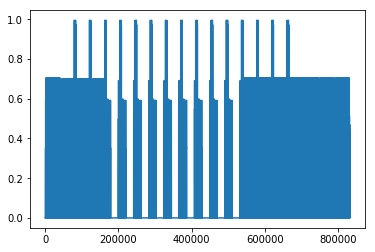

In [181]:
hog_extractor = cv2.HOGDescriptor()
hog = hog_extractor.compute(im_train[0].astype(np.uint8))
plt.plot(hog)

In [182]:
feature_HOG = []
label = []
for i in range(0,10):
    hog = hog_extractor.compute(im_train[i].astype(np.uint8))
    hog = hog.reshape(len(hog))
    feature_HOG.append(hog)
    label.append(i)

In [183]:
feature_HOG[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [184]:
[len(v) for v in feature_HOG]

[831600,
 831600,
 831600,
 831600,
 831600,
 831600,
 831600,
 831600,
 831600,
 831600]

In [185]:
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [186]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(feature_HOG, label)

In [187]:
prd = clf.predict(feature_HOG)
prd

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

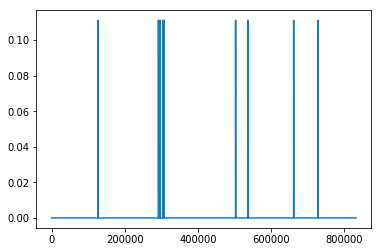

In [188]:
importances = clf.feature_importances_
plt.plot(importances)

In [189]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(feature_HOG, label)


In [190]:
pred = clf.predict(feature_HOG)
fpr, tpr, thresholds = roc_curve(label, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, label)

1.0

In [191]:
importances = clf.feature_importances_
indices = np.argsort(importances)

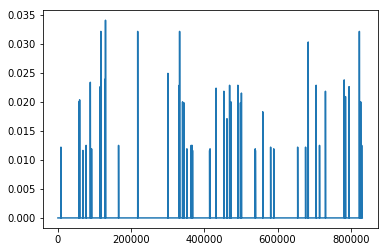

In [192]:
plt.plot(importances)

('Save', 'imgs/train/0000.png')
('Save', 'imgs/train/0001.png')
('Save', 'imgs/train/0002.png')
('Save', 'imgs/train/0003.png')
('Save', 'imgs/train/0004.png')
('Save', 'imgs/train/0005.png')
('Save', 'imgs/train/0006.png')
('Save', 'imgs/train/0007.png')
('Save', 'imgs/train/0008.png')
('Save', 'imgs/train/0009.png')
('Save', 'imgs/train/0010.png')
('Save', 'imgs/train/0011.png')
('Save', 'imgs/train/0012.png')
('Save', 'imgs/train/0013.png')
('Save', 'imgs/train/0014.png')
('Save', 'imgs/train/0015.png')
('Save', 'imgs/train/0016.png')
('Save', 'imgs/train/0017.png')
('Save', 'imgs/train/0018.png')
('Save', 'imgs/train/0019.png')
('Save', 'imgs/train/0020.png')
('Save', 'imgs/train/0021.png')
('Save', 'imgs/train/0022.png')
('Save', 'imgs/train/0023.png')
('Save', 'imgs/train/0024.png')
('Save', 'imgs/train/0025.png')
('Save', 'imgs/train/0026.png')
('Save', 'imgs/train/0027.png')
('Save', 'imgs/train/0028.png')
('Save', 'imgs/train/0029.png')
('Save', 'imgs/train/0030.png')
('Save',

('Save', 'imgs/train/0264.png')
('Save', 'imgs/train/0265.png')
('Save', 'imgs/train/0266.png')
('Save', 'imgs/train/0267.png')
('Save', 'imgs/train/0268.png')
('Save', 'imgs/train/0269.png')
('Save', 'imgs/train/0270.png')
('Save', 'imgs/train/0271.png')
('Save', 'imgs/train/0272.png')
('Save', 'imgs/train/0273.png')
('Save', 'imgs/train/0274.png')
('Save', 'imgs/train/0275.png')
('Save', 'imgs/train/0276.png')
('Save', 'imgs/train/0277.png')
('Save', 'imgs/train/0278.png')
('Save', 'imgs/train/0279.png')
('Save', 'imgs/train/0280.png')
('Save', 'imgs/train/0281.png')
('Save', 'imgs/train/0282.png')
('Save', 'imgs/train/0283.png')
('Save', 'imgs/train/0284.png')
('Save', 'imgs/train/0285.png')
('Save', 'imgs/train/0286.png')
('Save', 'imgs/train/0287.png')
('Save', 'imgs/train/0288.png')
('Save', 'imgs/train/0289.png')
('Save', 'imgs/train/0290.png')
('Save', 'imgs/train/0291.png')
('Save', 'imgs/train/0292.png')
('Save', 'imgs/train/0293.png')
('Save', 'imgs/train/0294.png')
('Save',

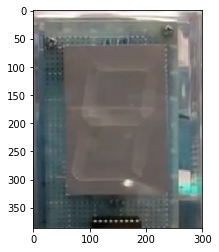

In [193]:
videopath='imgs/test.mov'
image_dir='imgs/train/'
i = 0
cap = cv2.VideoCapture(videopath)
while(cap.isOpened()):
    flag, frame = cap.read()  # Capture frame-by-frame
    if flag == False:  # Is a frame left?
        break
#    frame = np.logical_and(frame[:,:,1]>150, frame[:,:,0]<50)
#    frame = frame.astype(np.int)*255
    cv2.imwrite(image_dir  + str(i).zfill(4) + '.png', frame)  # Save a frame
    print('Save', image_dir + str(i).zfill(4) + '.png')
    i += 1
    plt.imshow(frame)

cap.release()  # When everything done, release the capture

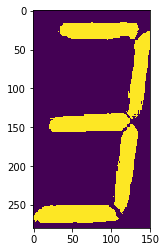

In [202]:
frame = cv2.imread('imgs/train/0180.png')
frame = cv2.resize(frame[80:310,80:220,:],(size[1],size[0]))
frame_ = np.logical_and(frame[:,:,1]>150, frame[:,:,0]<100)
frame_ = frame_.astype(np.int)*255
plt.imshow(frame_)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

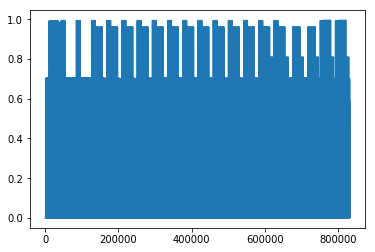

In [208]:
hog = hog_extractor.compute(frame_.astype(np.uint8))
hog = hog.reshape(len(hog))
plt.plot(hog)
hog

In [212]:
pred = clf.predict(hog.reshape(1, -1))
pred

array([3])